In [103]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Tools

1. Numpy --> array and matrix (vector) operations
2. Matplotlib --> visualization and plotting
3. Scipy --> scientific and numerical computation functions and tools (optimization module)

**Binary classification - 2 features and 1 label (0 or 1)**

you will build a logistic regression model to predict whether a student gets admitted into a university. 

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 

You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. 

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams.

## 1) Load the Dataset

In [104]:
# Load the dataset
data = np.loadtxt('ex2data1.txt', delimiter=',')

# The first two columns contains the exam scores and the third column contains the label 

# Split the dataset into features and labels
X, y = data[:, 0:2], data[:, 2]

In [105]:
len(X), len(y)

(100, 100)

In [106]:
X.shape, y.shape

((100, 2), (100,))

## 2) Plot and Visualize the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible.

display a figure where the axes are the two exam scores, and the positive and negative examples are shown with different markers.



* == in python --> used to check whether 2 expressions give the same value (compares the value or equality of two objects)
* k --> black color. * and o are just symbols
* 0, 1 are the first 2 columns --> represent 2 exams scores
* X[pos,0] --> positive samples(rows) in 1st column 
* X[neg,1] --> negative samples(rows) in 2nd column
* mec --> marker edge colour, mfc --> markfer face colour, ms --> marker size, mew --> marker edge width 

In [ ]:
"""
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An mx2 matrix representing the features of the dataset. [m --> no. of training samples]
    
    y : array_like
        Label values for the dataset. A vector of size (m, ) i.e. mx1 vector
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """

In [108]:
def plotData(X,y):
  figure = plt.figure(figsize=(8,6))

  # Find indices of pos and neg samples
  pos = y == 1
  neg = y == 0

  # Plot the samples
  plt.plot(X[pos,0], X[pos,1],'k*', lw=2, ms=10) # postive samples
  plt.plot(X[neg,0], X[neg,1],'ko', mfc='y', ms=8, mec='k', mew=1) # negative samples

  # Add axis label
  plt.xlabel("Exam 1 score")
  plt.ylabel("Exam 2 score")
  plt.legend(['Admitted','Not Admitted']) # 1 --> admitted(pos), 0 --> not admitted(neg)
  # plt.show()

  # print(X)
  # print(pos)
  # print(X[pos,0])

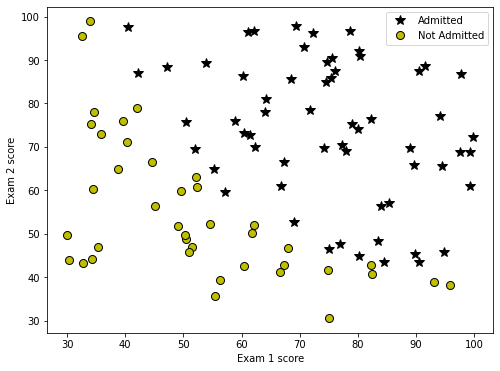

In [109]:
plotData(X,y)

## 3) Implementation of Algorithm

### 3.1) Sigmoid Function

the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$

For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5.
<a id="sigmoid"></a>

In [ ]:
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix or scalar. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """

In [111]:
def sigmoid(z):
  # convert input into numpy array
  z = np.array(z)

  # shape of g will be exactly the same shape as z
  g = np.zeros(z.shape) # creating a matrix

  # algorithm
  g = 1/(1+np.exp(-z))

  return g

In [112]:
# Test the implementation of sigmoid function 
z = 0
g = sigmoid(z)
print(f'g ({z}) = {g}')

g (0) = 0.5


### 3.2) Cost function and Gradient descent

*  Before proceeding we add the intercept term to X

In [113]:
# Setup the data matrix appropriately
m, n = X.shape # (sample,features)
# m --> training samples(rows), n --> features(columns)

# Add intercept term X0=1 to X
X = np.concatenate([np.ones((m, 1)), X], axis=1) # matrix

the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient descent of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

<a id="costFunction"></a>

In [ ]:
    """
    Compute cost and gradient descent for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ). i.e. (n+1)x1 vector
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features.
    
    y : array_like
        Labels for the input. This is a vector of shape (m, ). i.e. mx1 vector
    
    Returns
    -------
    J : float
        The computed value for the cost function. (min J)
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta. (optimial theta that minimizes the cost function J)
    """

In [115]:
def costFunction(theta, X, y):

  # Initialize some useful values
  m = y.size # no. of training samples (rows of X = rows of y)

  J = 0
  grad = np.zeros(theta.shape) # paramters theta

  # Algorithm
  h = sigmoid(X.dot(theta.T)) 

  J =-(1/m) * (y.dot(np.log(h))+(1-y).dot(np.log(1-h)))

  grad = (1/m) * (h-y).dot(X)

  return J,grad


In [116]:
# use two test cases for 𝜃  

# 1st test case of 𝜃 --> 𝜃 is all 0s

initial_theta = np.zeros(n+1) # n+1 because of the addition of X0 = 1

cost, grad = costFunction(initial_theta, X, y)

print('Cost at theta (zeros): {:.3f}'.format(cost))

print('Gradient at theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad)) # *grad -> * collects all the positional arguments in a tuple.

Cost at theta (zeros): 0.693
Gradient at theta (zeros):
	[-0.1000, -12.0092, -11.2628]


In [117]:
# 2nd test case of 𝜃 --> 𝜃 is non-zero

test_theta = np.array([-24, 0.2, 0.2]) # n+1 
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))

Cost at test theta: 0.218
Gradient at test theta:
	[0.043, 2.566, 2.647]


### Learning parameters using scipy.optimize

This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). 

**SciPy** is a numerical computing library for `python`. It provides an **optimization module for root finding and minimization.** 

As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, to optimize the cost function $J(\theta)$ with parameters $\theta$, we are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). 

You will pass to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

If we have completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. By using `optimize.minimize`, we did not have to write any loops, or set a learning rate for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.

* see documention for scipy's optimize.minimize  for description about the different parameters
* The function returns an object `OptimizeResult`
* We use truncated Newton algorithm for optimization which is equivalent to MATLAB's fminunc
* See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy

In [118]:
initial_theta = np.zeros(n+1) # 1st test case of 𝜃 --> 𝜃 is all 0s

# set options for optimize.minimize
options = {'maxiter': 400} # maximum number of iterations of the algorithm before it terminates.

result = optimize.minimize(costFunction, # reference to the function above
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns the value of costFunction at optimized theta
cost = result.fun

# the optimized theta is in the x property
theta = result.x

print('Cost(J) at theta found by optimize.minimize: {:.3f}'.format(cost))

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta)) # 3 thetas --> n+1

Cost(J) at theta found by optimize.minimize: 0.203
theta:
	[-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training data as shown in the figure below. 

To do so, write a function `plotDecisionBoundary` for plotting the decision boundary on top of training data.  

look at the code in `plotDecisionBoundary` to see how to plot such a boundary using the $\theta$ values.

In [ ]:
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, ).
    """

In [119]:
### ** Understand this complicated function

def plotDecisionBoundary(plotData, theta, X, y):

    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

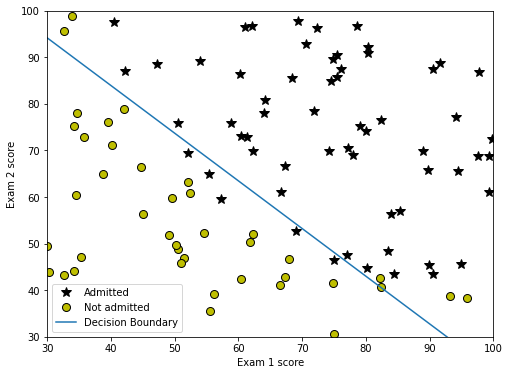

In [120]:
plotDecisionBoundary(plotData, theta, X, y)

## 4) Evaluating Logistic Regression

After learning the parameters, use the model to predict whether a particular student will be admitted or not. 

Another way to evaluate the quality of the parameters found is to see how well the learned model predicts on training set.

The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. 


In [ ]:
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ). (n+1)x1 vector
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions, and 0 or 1 for each row in X. 
      
    """

In [123]:
def predict(theta, X):

  m = y.shape # or X[0].shape --> no. of training samples

  p = np.zeros(m) # create a matrix with same shape as m

  # use hypthothesis function for prediction
  h = sigmoid(X.dot(theta.T)) 

  p = np.round(h)
  return p

### 4.1) Predicting values on new X

In [127]:
#  Predict probability of admission for a student with score 45 on exam 1 and score 85 on exam 2 

# Prediction is done using hypothesis function
g = np.dot([1, 45, 85], theta) # the optimized theta
prob = sigmoid(g)

print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))

if prob >= 0.5:
  print("sigmoid(theta.T*x) >= 0.5 --> y = 1. So the student is admitted")
else:
  print("sigmoid(theta.T*x) < 0.5 --> y = 0. So the student is not admitted")

For a student with scores 45 and 85,we predict an admission probability of 0.776
sigmoid(theta.T*x) >= 0.5 --> y = 1. So the student is admitted


### 4.2) Compute accuracy of Training Set

report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [128]:
# Compute accuracy on our training set - we use mean() of samples here to compute accuracy

p = predict(theta,X) # the optimized theta
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

Train Accuracy: 89.00 %
